In [1]:
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt


# Questão 2

In [2]:
def monta_matriz_P_grafo_anel(n,p):
  P = np.zeros((n,n))
  for i in range(-1, n-1):
    P[i][i] = p
    P[i][i+1] = p/2
    P[i][i-1] = p/2
  return P

In [3]:
def monta_matriz_P_grafo_arvore(n,p):
  P = np.zeros((n,n))
  P[0][0] = p
  P[0][1] = p/2
  P[0][2] = p/2
  for i in range(1,n):
    P[i][i] = p
    if i<(n-1)/2:
        P[i][2*i] = p/3
        P[i][2*i+1] = p/3
        P[i][int((i-1)/2)] = p/3
    else:
        P[i][int((i-1)/2)] = p
  return P

In [4]:
def monta_matriz_P_grafo_grid(n,p):
  P_grid = np.zeros((n,n))
  for i in range(10):
    for j in range(10):
        P_grid[i*10+j][i*10+j] = 0.5
        if i == 0 and j != 0 and j != 9:
            P_grid[i*10+j][i*10+j+1] = 1/6
            P_grid[i*10+j][i*10+j-1] = 1/6
            P_grid[i*10+j][(i+1)*10+j] = 1/6
        elif i == 9 and j != 0 and j != 9:
            P_grid[i*10+j][i*10+j+1] = 1/6
            P_grid[i*10+j][i*10+j-1] = 1/6
            P_grid[i*10+j][(i-1)*10+j] = 1/6
        elif j == 0 and i != 0 and i != 9:
            P_grid[i*10+j][i*10+j+1] = 1/6
            P_grid[i*10+j][(i+1)*10+j] = 1/6
            P_grid[i*10+j][(i-1)*10+j] = 1/6
        elif j == 9 and i != 0 and i != 9:
            P_grid[i*10+j][i*10+j-1] = 1/6
            P_grid[i*10+j][(i+1)*10+j] = 1/6
            P_grid[i*10+j][(i-1)*10+j] = 1/6
        elif i == 0 and j == 0:
            P_grid[i*10+j][i*10+j+1] = 0.25
            P_grid[i*10+j][(i+1)*10+j] = 0.25
        elif i == 0 and j == 9:
            P_grid[i*10+j][i*10+j-1] = 0.25
            P_grid[i*10+j][(i+1)*10+j] = 0.25
        elif i == 9 and j == 9:
            P_grid[i*10+j][i*10+j-1] = 0.25
            P_grid[i*10+j][(i-1)*10+j] = 0.25
        elif i == 9 and j == 0:
            P_grid[i*10+j][i*10+j+1] = 0.25
            P_grid[i*10+j][(i-1)*10+j] = 0.25
        else:
            P_grid[i*10+j][(i-1)*10+j] = 1/8
            P_grid[i*10+j][i*10+j+1] = 1/8
            P_grid[i*10+j][(i+1)*10+j]  = 1/8
            P_grid[i*10+j][i*10+j-1] = 1/8
    return P_grid

In [5]:
def monta_matriz_P_grafo_grid(n,p):
  matriz_P = np.zeros((n,n))
  d = int(math.sqrt(n))
  lim=d-1
  for col in range(d):
    for lin in range(d):
      matriz_P[col*d+lin][col*d+lin] = p
      if col == 0 and lin == 0:
        k=2
        matriz_P[col*d+lin][(col+1)*d+lin] = p/k
        matriz_P[col*d+lin][(lin+1)+col*d] = p/k
      elif col == 0 and lin == lim:
        k=2
        matriz_P[col*d+lin][(col+1)*d+lin] = p/k
        matriz_P[col*d+lin][(lin-1)+col*d] = p/k
      elif col == lim and lin == 0:
        k=2
        matriz_P[col*d+lin][(col-1)*d+lin]  = p/k
        matriz_P[col*d+lin][(lin+1)+col*d] = p/k
      elif col == lim and lin == lim:
        k=2
        matriz_P[col*d+lin][(col-1)*d+lin]  = p/k
        matriz_P[col*d+lin][(lin-1)+col*d] = p/k
      elif col == 0 and lin > 0 and lin < lim:
        k=3
        matriz_P[col*d+lin][(col+1)*d+lin] = p/k
        matriz_P[col*d+lin][(lin+1)+col*d] = p/k
        matriz_P[col*d+lin][(lin-1)+col*d] = p/k
      elif col == lim and lin > 0 and lin < lim:
        k=3
        matriz_P[col*d+lin][(col-1)*d+lin]  = p/k
        matriz_P[col*d+lin][(lin+1)+col*d] = p/k
        matriz_P[col*d+lin][(lin-1)+col*d] = p/k
      elif lin == 0 and col > 0 and col < lim:
        k=3
        matriz_P[col*d+lin][(col+1)*d+lin] = p/k
        matriz_P[col*d+lin][(col-1)*d+lin]  = p/k
        matriz_P[col*d+lin][(lin+1)+col*d] = p/k
      elif lin == lim and col > 0 and col < lim:
        k=3
        matriz_P[col*d+lin][(col+1)*d+lin] = p/k
        matriz_P[col*d+lin][(col-1)*d+lin]  = p/k
        matriz_P[col*d+lin][(lin-1)+col*d] = p/k
      else:
        k=4
        matriz_P[col*d+lin][(col+1)*d+lin] = p/k
        matriz_P[col*d+lin][(col-1)*d+lin]  = p/k
        matriz_P[col*d+lin][(lin+1)+col*d] = p/k
        matriz_P[col*d+lin][(lin-1)+col*d] = p/k
  return matriz_P

In [6]:
#definição de parâmetros
t_passos=10**3
n=100
p=1/2

In [7]:
# construção das matrizes de transição P para os grafos em anel, arvore binaria cheia e grid2d
matriz_P_anel = monta_matriz_P_grafo_anel(n, p)
matriz_P_arvore = monta_matriz_P_grafo_arvore(n, p)
matriz_P_grid = monta_matriz_P_grafo_grid(n,p)

print("Matriz do grafo em anel: \n", matriz_P_anel, "\n\n", 
      "Matriz do grafo em arvore binária cheia: \n", matriz_P_arvore, "\n\n", 
      "Matriz do grafo em grid2D: \n", matriz_P_grid,"\n\n")

Matriz do grafo em anel: 
 [[0.5  0.25 0.   ... 0.   0.   0.25]
 [0.25 0.5  0.25 ... 0.   0.   0.  ]
 [0.   0.25 0.5  ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.5  0.25 0.  ]
 [0.   0.   0.   ... 0.25 0.5  0.25]
 [0.25 0.   0.   ... 0.   0.25 0.5 ]] 

 Matriz do grafo em arvore binária cheia: 
 [[0.5        0.25       0.25       ... 0.         0.         0.        ]
 [0.16666667 0.5        0.16666667 ... 0.         0.         0.        ]
 [0.16666667 0.         0.5        ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.5        0.         0.        ]
 [0.         0.         0.         ... 0.         0.5        0.        ]
 [0.         0.         0.         ... 0.         0.         0.5       ]] 

 Matriz do grafo em grid2D: 
 [[0.5        0.25       0.         ... 0.         0.         0.        ]
 [0.16666667 0.5        0.16666667 ... 0.         0.         0.        ]
 [0.         0.16666667 0.5        ... 0.         0.         0.        ]
 ...

In [8]:
# determinação da distribuição estacionária pi para cada grafo
def computar_pi(M): # computa a distribuição estacionária e o vão espectral para uma dada matriz P
    autovalores,autovetores = np.linalg.eig(M.T)
    posicao_lambda_1 = np.argmax(autovalores)
    lambda_1 = np.real(autovetores[:,posicao_lambda_1])
    pi = lambda_1/np.sum(lambda_1)
    return pi

pi_anel = computar_pi(matriz_P_anel)
pi_arvore = computar_pi(matriz_P_arvore)
pi_grid = computar_pi(matriz_P_grid)

print("Distribuição estacionária do grafo em anel: \n", pi_anel, "\n\n", 
      "Distribuição estacionária do grafo em arvore binária cheia: \n", pi_arvore, "\n\n", 
      "Distribuição estacionária do grafo em grid2D: \n", pi_grid,"\n\n")


Distribuição estacionária do grafo em anel: 
 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01] 

 Distribuição estacionária do grafo em arvore binária cheia: 
 [0.01567099 0.02027494 0.02673803 0.01793127 0.01938705 0.01945603
 0.01697664 0.01674468 0.01677419 0.01610992 0.01531321 0.01491903
 0.01671104 0.01659721 0.01640145 0.01625435 0.01604843 0.01573738
 0.01519814 0.01480738 0.01413533 0.01363053 0.01285306 0.01196765
 0.01333341 0.0166225  0.01653397 0.01647073 0.01634425 0.01628704
 0.01617263 0.01609091 0.01592747 0.0158065  

In [9]:
# passeio aleatório com t passos para cada grafo

def passeio_markov_chain(matriz_P, t_passos):
  pi_zero = np.zeros(n)
  pi_zero[0] = 1
  M_pi = []
  M_pi.append(pi_zero)
  for t in range(t_passos):
    M_pi = np.append(M_pi, [M_pi[t-1]]@matriz_P, axis=0)
  print(M_pi)
  return M_pi

passeio_anel = passeio_markov_chain(matriz_P_anel, t_passos)
passeio_arvore = passeio_markov_chain(matriz_P_arvore, t_passos)
passeio_grid = passeio_markov_chain(matriz_P_grid, t_passos)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.5        0.25       0.         ... 0.         0.         0.25      ]
 [0.5        0.25       0.         ... 0.         0.         0.25      ]
 ...
 [0.02525027 0.02519977 0.02504887 ... 0.02479938 0.02504887 0.02519977]
 [0.02522502 0.02517467 0.02502422 ... 0.02477547 0.02502422 0.02517467]
 [0.02522502 0.02517467 0.02502422 ... 0.02477547 0.02502422 0.02517467]]
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.5        0.25       0.25       ... 0.         0.         0.        ]
 [0.5        0.25       0.25       ... 0.         0.         0.        ]
 ...
 [0.01567099 0.02027495 0.02673803 ... 0.00333337 0.00222224 0.00222224]
 [0.01567099 0.02027494 0.02673803 ... 0.00333337 0.00222224 0.00222224]
 [0.01567099 0.02027494 0.02673803 ... 0.00333337 0.00222224 0.00222224]]
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.5        0.25       0.         ... 

In [10]:
# computar a diferença entre a distribuição estacionária e o passeio aleatório de cada grafo
diferenca_anel = []
diferenca_arvore = []
diferenca_grid = []
for i in range(t_passos):
  diferenca_anel.append(np.sum(np.abs(pi_anel-passeio_anel[i]))/2)
  diferenca_arvore.append(np.sum(np.abs(pi_arvore-passeio_arvore[i]))/2)
  diferenca_grid.append(np.sum(np.abs(pi_grid-passeio_grid[i]))/2)

[]

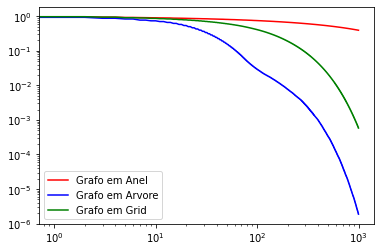

In [11]:
# plotar os graficos das diferenças

plt.plot(diferenca_anel, label="Grafo em Anel", color='r')
plt.plot(diferenca_arvore, label="Grafo em Arvore", color='b')
plt.plot(diferenca_grid, label="Grafo em Grid", color='g')
plt.legend()
plt.loglog()

# Questão 3

In [12]:
def computar_pi_sigma(M): # computa a distribuição estacionária e o vão espectral para uma dada matriz P
    autovalores,autovetores = np.linalg.eig(M.T)
    autovalores,autovetores = np.abs(autovalores), np.abs(autovetores)
    posicao_lambda_1 = np.argmax(autovalores)
    pi = np.real(autovetores[:,posicao_lambda_1])/np.sum(np.abs(autovetores[:,posicao_lambda_1]))
    sigma = 1 - np.sort(np.abs(np.linalg.eigvals(M)))[-2]
    return pi, sigma

def computar_cadeia_markov_nasc_morte(n, p, e):
  P = np.zeros((n,n)) # matriz de transição de probabilidade
  for i in range(n):
    for j in range(n):
      if j==0:
        P[i][j] = (1-p)
      if j==i+1:
        P[i][j] = p
      if j==n-1 and i==n-1:
        P[i][j] = p
  print('\033[1m'+"Resultados para p =",p,'\033[0m \n')
  print("Matriz P de transição de probabilidade: \n",P)
  pi,sigma = computar_pi_sigma(P)
  print("Distribuição estacionária pi: \n",pi)
  print("Vão espectral: \n",sigma)
  menor_prob_pi = np.min(pi)
  print("Estado de menor probabilidade: \n", np.argmin(pi)+1)
  print("Limitantes para o tempo de mistura: \n", 
        (1/sigma -1)*np.log(1/(2*e)) , "<= t <=", np.log(1/(menor_prob_pi*e))/sigma)
  print("-=-"*30)

n = 10 # numero de estados
e = 10**(-6) # epsilon
computar_cadeia_markov_nasc_morte(n,1/4,e)
computar_cadeia_markov_nasc_morte(n,1/2,e)
computar_cadeia_markov_nasc_morte(n,3/4,e)

Resultados para p = 0.25  

Matriz P de transição de probabilidade: 
 [[0.75 0.25 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.75 0.   0.25 0.   0.   0.   0.   0.   0.   0.  ]
 [0.75 0.   0.   0.25 0.   0.   0.   0.   0.   0.  ]
 [0.75 0.   0.   0.   0.25 0.   0.   0.   0.   0.  ]
 [0.75 0.   0.   0.   0.   0.25 0.   0.   0.   0.  ]
 [0.75 0.   0.   0.   0.   0.   0.25 0.   0.   0.  ]
 [0.75 0.   0.   0.   0.   0.   0.   0.25 0.   0.  ]
 [0.75 0.   0.   0.   0.   0.   0.   0.   0.25 0.  ]
 [0.75 0.   0.   0.   0.   0.   0.   0.   0.   0.25]
 [0.75 0.   0.   0.   0.   0.   0.   0.   0.   0.25]]
Distribuição estacionária pi: 
 [7.50000000e-01 1.87500000e-01 4.68750000e-02 1.17187500e-02
 2.92968750e-03 7.32421875e-04 1.83105469e-04 4.57763672e-05
 1.14440918e-05 3.81469727e-06]
Vão espectral: 
 0.9986182081232499
Estado de menor probabilidade: 
 10
Limitantes para o tempo de mistura: 
 0.01815746495624088 <= t <= 26.32854037122921
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-

# Questão 4

In [13]:
def passo_cadeia_markov_latice(x,y,p):
  p_ne = p/2 # probabilidade de ir pro norte ou leste
  p_n = p_ne/2 # probabilidade de ir pro norte
  p_e = p_n # probabilidade de ir pro leste
  p_so = (1-p)/2 # probabilidade de ir pro sul ou oeste quando há somente uma dessas possibilidades
  p_s = p_so/2 # probabilidade de ir pro sul quando há também a possibilidade de ir pra oeste
  p_o = p_s # probabilidade de ir pro sul quando há também a possibilidade de ir pra oeste
  u = np.random.uniform() # escolhe uniforme entre 0 e 1, e com base no valor obtido e nas possibilidades de movimento, decide se permanece no mesmo lugar, ou se move em algum sentido

  if x==1 and y==1: # só pode andar pro norte ou leste
    if u<p_n: # anda pro norte
      return x,y+1
    elif u<2*p_e: # anda pro leste
      return x+1,y
    else:
      return x,y
  elif x==1 and y>1: # pode andar pro norte, sul e leste
    if u<p_n: # anda pro norte
      return x+1,y
    elif u<p_n+p_e: # anda pro leste
      return x,y+1
    elif u<p_n+p_e+p_so: # anda pro sul
      return x,y-1
    else:
      return x,y
  elif x>1 and y==1: # pode andar pro norte, leste e oeste
    if u<p_n: # anda pro norte
      return x,y+1
    elif u<p_n+p_e: # anda pro leste
      return x+1,y
    elif u<p_n+p_e+p_so: # anda pro oeste
      return x-1,y
    else:
      return x,y
  else:
    if u<p_n: # anda pro norte
      return x,y+1
    elif u<p_n+p_e: # anda pro leste
      return x+1,y
    elif u<p_n+p_e+p_s: # anda pro sul 
      return x,y-1
    elif u<p_n+p_s+p_e+p_o: # anda pro oeste
      return x-1,y
    else:
      return x,y

In [14]:
def estimar_pi_1_1(p,n):
  x = 1 # valor de x inicial
  y = 1 # valor de y inicial
  c = 0 # frequencia de visitas em pi (1,1)
  for i in range(n):
    x, y = passo_cadeia_markov_latice(x,y,p)
    if (x,y) == (1,1):
      c+=1
  return c/n

n=10**6
pis = []
ps = [0.25, 0.35, 0.45]
for p in ps:
  pis.append(estimar_pi_1_1(p,n))

for (p,pi) in zip(ps,pis):
  print(f"Estimativa de pi(1,1) para p={p}: {pi}")
  print("-=-"*30)

Estimativa de pi(1,1) para p=0.25: 0.666769
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
Estimativa de pi(1,1) para p=0.35: 0.461903
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
Estimativa de pi(1,1) para p=0.45: 0.183472
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-


In [25]:
def estimar_distancia_Manhattan(p,n):
  x = 1 # valor de x inicial
  y = 1 # valor de y inicial
  d = 0 # distancia acumulada
  for _ in range(n):
    x,y = passo_cadeia_markov_latice(x,y,p)
    d += x-1+y-1
  return d/n
ps = [0.25, 0.35, 0.45]
ns = [10,100,1000]

for prob in ps:
  for num in ns:
    d = estimar_distancia_Manhattan(prob,num)
    print(f"Estimativa da distância de Manhattan para p={prob} e n={num}: {d}")
  print("-=-"*30)

Estimativa da distância de Manhattan para p=0.25 e n=10: 0.1
Estimativa da distância de Manhattan para p=0.25 e n=100: 0.31
Estimativa da distância de Manhattan para p=0.25 e n=1000: 0.438
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
Estimativa da distância de Manhattan para p=0.35 e n=10: 0.1
Estimativa da distância de Manhattan para p=0.35 e n=100: 0.84
Estimativa da distância de Manhattan para p=0.35 e n=1000: 1.21
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
Estimativa da distância de Manhattan para p=0.45 e n=10: 0.1
Estimativa da distância de Manhattan para p=0.45 e n=100: 5.49
Estimativa da distância de Manhattan para p=0.45 e n=1000: 3.967
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
